In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [8]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv")
df.head(2)

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
0,2529604,28.04.2019,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
1,2529605,29.04.2019,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [9]:
#Define a size
plt.rcParams["figure.figsize"] = (12, 8)

In [10]:
#filter columns for Time Series
df_ts = df[["Date","QTY"]]

In [11]:
#Prepare columns 
x=df_ts["Date"]
y=df_ts["QTY"]

In [12]:
#Check input and target columns
input_seq = []
target_seq = []
for i in range(len(y) - 10):
    input_seq.append(y[i:i+10])
    target_seq.append(y[i+10])

input_seq = np.array(input_seq)
target_seq = np.array(target_seq)

In [14]:
#Split data for train, and val data
train_size = int(len(input_seq) * 0.8)
train_input = torch.from_numpy(input_seq[:train_size]).float()
train_target = torch.from_numpy(target_seq[:train_size]).float()
val_input = torch.from_numpy(input_seq[train_size:]).float()
val_target = torch.from_numpy(target_seq[train_size:]).float()

In [15]:
#Create model
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=32, batch_first=True)
        self.linear = nn.Linear(32, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.linear(lstm_out[:, -1, :])
        return out

In [16]:
#Create measure and optimizer
model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
#Fit models
epochs = 1000

train_loss = []
val_loss = []

for epoch in range(epochs):
    # train
    optimizer.zero_grad()
    output = model(train_input.unsqueeze(2))
    loss = criterion(output.squeeze(), train_target)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    # validate
    with torch.no_grad():
        output = model(val_input.unsqueeze(2))
        loss = criterion(output.squeeze(), val_target)
        val_loss.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Train loss = {train_loss[-1]:.4f}, Val loss = {val_loss[-1]:.4f}')

Epoch 0: Train loss = 536854.3750, Val loss = 711018.1250
Epoch 100: Train loss = 514789.7500, Val loss = 680000.3125
Epoch 200: Train loss = 496476.0625, Val loss = 653684.5000
Epoch 300: Train loss = 480294.2812, Val loss = 630060.5625
Epoch 400: Train loss = 465383.5625, Val loss = 608102.1875
Epoch 500: Train loss = 452277.3438, Val loss = 588733.7500
Epoch 600: Train loss = 440366.8438, Val loss = 571367.7500
Epoch 700: Train loss = 429533.4688, Val loss = 555697.3750
Epoch 800: Train loss = 419249.2812, Val loss = 541065.4375
Epoch 900: Train loss = 409837.3750, Val loss = 527308.3125


In [11]:
#Finally, we can use the trained model to make predictions
with torch.no_grad():
    test_input = torch.from_numpy(input_seq[train_size:]).float()
    forecast = model(test_input.unsqueeze(2)).squeeze().numpy()

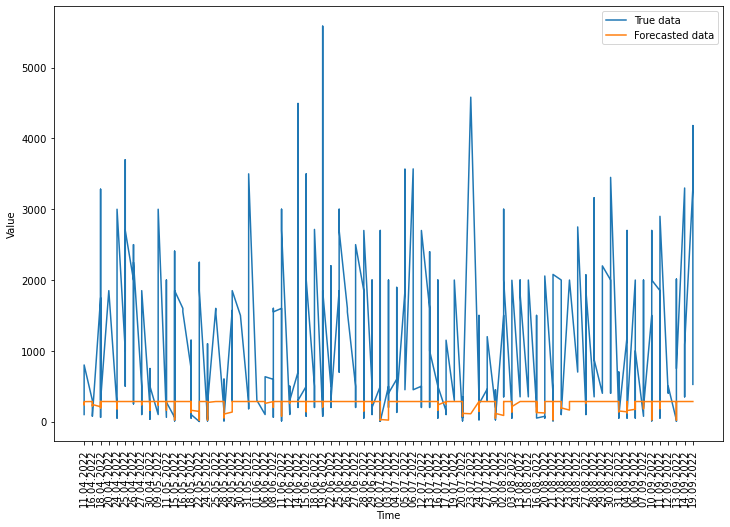

In [12]:
plt.plot(x[train_size+10:], y[train_size+10:], label='True data')
plt.plot(x[train_size+10:], forecast, label='Forecasted data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [17]:
#Fit models with smaller amount of epochs
epochs = 500

train_loss = []
val_loss = []

for epoch in range(epochs):
    # train
    optimizer.zero_grad()
    output = model(train_input.unsqueeze(2))
    loss = criterion(output.squeeze(), train_target)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    # validate
    with torch.no_grad():
        output = model(val_input.unsqueeze(2))
        loss = criterion(output.squeeze(), val_target)
        val_loss.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Train loss = {train_loss[-1]:.4f}, Val loss = {val_loss[-1]:.4f}')

Epoch 0: Train loss = 536267.3750, Val loss = 710098.2500
Epoch 100: Train loss = 513654.9062, Val loss = 678360.3750
Epoch 200: Train loss = 494203.5000, Val loss = 650407.3125
Epoch 300: Train loss = 477795.2812, Val loss = 626318.5000
Epoch 400: Train loss = 463393.0000, Val loss = 604907.6875


In [18]:
#We can use the trained model to make predictions
with torch.no_grad():
    test_input = torch.from_numpy(input_seq[train_size:]).float()
    forecast = model(test_input.unsqueeze(2)).squeeze().numpy()

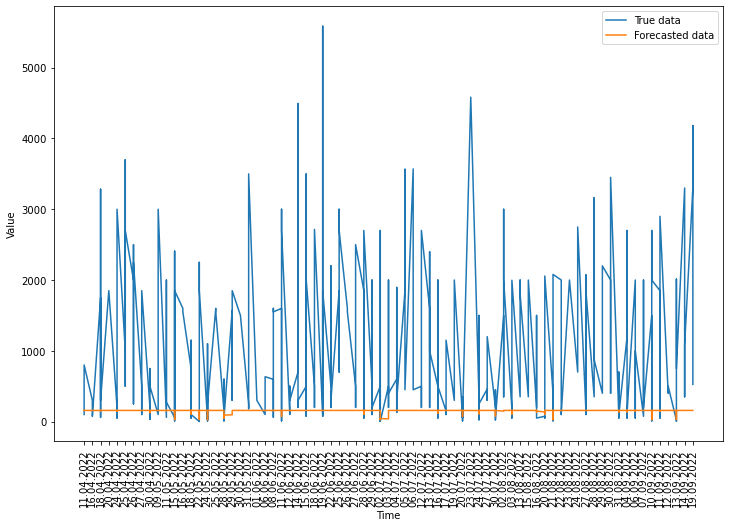

In [19]:
plt.plot(x[train_size+10:], y[train_size+10:], label='True data')
plt.plot(x[train_size+10:], forecast, label='Forecasted data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [20]:
#Fit models with bigger amount of epochs
epochs = 2000

train_loss = []
val_loss = []

for epoch in range(epochs):
    # train
    optimizer.zero_grad()
    output = model(train_input.unsqueeze(2))
    loss = criterion(output.squeeze(), train_target)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    # validate
    with torch.no_grad():
        output = model(val_input.unsqueeze(2))
        loss = criterion(output.squeeze(), val_target)
        val_loss.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Train loss = {train_loss[-1]:.4f}, Val loss = {val_loss[-1]:.4f}')

Epoch 0: Train loss = 450528.7500, Val loss = 585661.6875
Epoch 100: Train loss = 438696.6562, Val loss = 568332.8125
Epoch 200: Train loss = 427590.3125, Val loss = 552835.7500
Epoch 300: Train loss = 417442.1875, Val loss = 537977.7500
Epoch 400: Train loss = 407879.0938, Val loss = 524362.3125
Epoch 500: Train loss = 399088.6250, Val loss = 511277.4375
Epoch 600: Train loss = 390760.4062, Val loss = 499671.4062
Epoch 700: Train loss = 383501.3438, Val loss = 488869.0938
Epoch 800: Train loss = 375650.3438, Val loss = 478300.3438
Epoch 900: Train loss = 368941.5938, Val loss = 468873.1875
Epoch 1000: Train loss = 362561.2188, Val loss = 460172.5312
Epoch 1100: Train loss = 358368.2500, Val loss = 452271.7500
Epoch 1200: Train loss = 350788.5938, Val loss = 443289.6562
Epoch 1300: Train loss = 345172.1562, Val loss = 436923.4375
Epoch 1400: Train loss = 340212.4688, Val loss = 429131.6562
Epoch 1500: Train loss = 335267.2500, Val loss = 422405.4062
Epoch 1600: Train loss = 331128.5625

In [21]:
#We can use the trained model to make predictions
with torch.no_grad():
    test_input = torch.from_numpy(input_seq[train_size:]).float()
    forecast = model(test_input.unsqueeze(2)).squeeze().numpy()

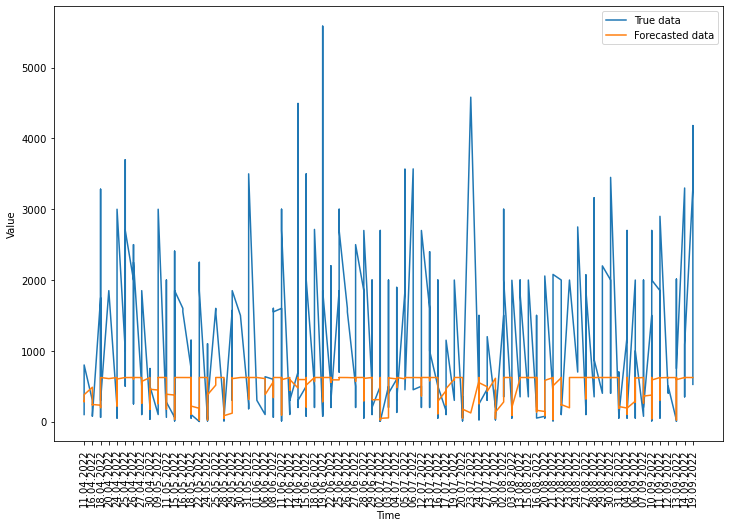

In [22]:
plt.plot(x[train_size+10:], y[train_size+10:], label='True data')
plt.plot(x[train_size+10:], forecast, label='Forecasted data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [23]:
#Fit models with 3000 of epochs, to see if more epochs give us better value in terms of measure
epochs = 3000

train_loss = []
val_loss = []

for epoch in range(epochs):
    # train
    optimizer.zero_grad()
    output = model(train_input.unsqueeze(2))
    loss = criterion(output.squeeze(), train_target)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

    # validate
    with torch.no_grad():
        output = model(val_input.unsqueeze(2))
        loss = criterion(output.squeeze(), val_target)
        val_loss.append(loss.item())
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Train loss = {train_loss[-1]:.4f}, Val loss = {val_loss[-1]:.4f}')

Epoch 0: Train loss = 315065.0625, Val loss = 395422.9688
Epoch 100: Train loss = 310178.4062, Val loss = 394086.7188
Epoch 200: Train loss = 306500.4375, Val loss = 388374.3750
Epoch 300: Train loss = 302471.4688, Val loss = 384057.5938
Epoch 400: Train loss = 301029.8750, Val loss = 379254.9062
Epoch 500: Train loss = 295928.5312, Val loss = 377324.0312
Epoch 600: Train loss = 294964.1250, Val loss = 372579.7500
Epoch 700: Train loss = 291621.3438, Val loss = 369710.0000
Epoch 800: Train loss = 286581.8125, Val loss = 368238.0000
Epoch 900: Train loss = 287552.9375, Val loss = 365316.1562
Epoch 1000: Train loss = 283611.5625, Val loss = 361242.8125
Epoch 1100: Train loss = 285222.2500, Val loss = 358703.5625
Epoch 1200: Train loss = 276720.6562, Val loss = 356919.3438
Epoch 1300: Train loss = 276674.7812, Val loss = 356839.0312
Epoch 1400: Train loss = 275721.8438, Val loss = 354652.7812
Epoch 1500: Train loss = 272919.4062, Val loss = 352785.7812
Epoch 1600: Train loss = 268931.4375

In [24]:
#We can use the trained model to make predictions
with torch.no_grad():
    test_input = torch.from_numpy(input_seq[train_size:]).float()
    forecast = model(test_input.unsqueeze(2)).squeeze().numpy()

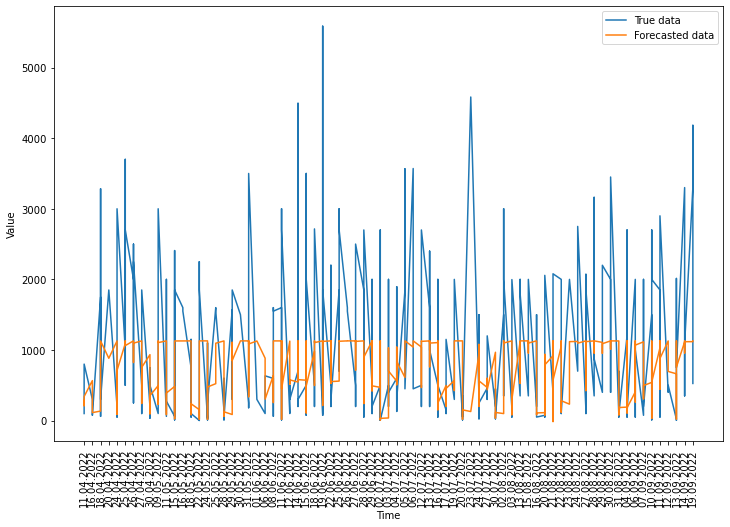

In [25]:
plt.plot(x[train_size+10:], y[train_size+10:], label='True data')
plt.plot(x[train_size+10:], forecast, label='Forecasted data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()